In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [3]:
from tensorflow.keras.layers import Dense, Input, ReLU
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import fashion_mnist
from numpy import reshape

In [4]:
fashion_data = fashion_mnist.load_data()

In [6]:
(xTrain, _), (xTest, _) = fashion_data

xTrain = xTrain.astype('float32') / 255.
xTest = xTest.astype('float32') / 255.

In [7]:
xTrain.shape, xTest.shape

((60000, 28, 28), (10000, 28, 28))

In [8]:
input_shape = (28 * 28)

In [9]:
xTrain = xTrain.reshape(len(xTrain), input_shape)
xTest = xTest.reshape(len(xTest), input_shape)

In [10]:
print(xTrain.shape)
print(xTest.shape)

(60000, 784)
(10000, 784)


# Encoder

In [11]:
latentSize = 8

In [15]:
encoderInput = Input(shape= (input_shape,))
encoderDense1 = Dense(units= 512, activation= 'relu')(encoderInput)
encoderActiv1 = ReLU()(encoderDense1)
encoderDense2 = Dense(units= 256, activation= 'relu')(encoderActiv1)
encoderActiv2 = ReLU()(encoderDense2)
encoderDense3 = Dense(units= latentSize)(encoderActiv2)
encoderOutput = ReLU()(encoderDense3)

encoder = Model(encoderInput, encoderOutput)

In [16]:
encoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
re_lu_3 (ReLU)               (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
re_lu_4 (ReLU)               (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 2056      
_________________________________________________________________
re_lu_5 (ReLU)               (None, 8)                 0   

# Decoder

In [19]:
decoderInput = Input(shape= (latentSize,))
decoderDense1 = Dense(units=256, activation="relu")(decoderInput)
decoderActiv1 = ReLU()(decoderDense1)
decoderDense2 = Dense(units=512, activation="relu")(decoderActiv1)
decoderActiv2 = ReLU()(decoderDense2)
decoderDense3 = Dense(units=input_shape, activation='sigmoid')(decoderActiv2)
decoderOutput = ReLU()(decoderDense3)

decoder = Model(decoderInput, decoderOutput)

In [20]:
decoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 8)]               0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               2304      
_________________________________________________________________
re_lu_8 (ReLU)               (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               131584    
_________________________________________________________________
re_lu_9 (ReLU)               (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 784)               402192    
_________________________________________________________________
re_lu_10 (ReLU)              (None, 784)               0   

# Autoencoder

In [22]:
aenInput = Input(shape=(input_shape,))
aenEncOutput = encoder(aenInput)
aenDecOutput = decoder(aenEncOutput)
aen = Model(aenInput, aenDecOutput)

In [23]:
aen.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
model_1 (Functional)         (None, 8)                 535304    
_________________________________________________________________
model_2 (Functional)         (None, 784)               536080    
Total params: 1,071,384
Trainable params: 1,071,384
Non-trainable params: 0
_________________________________________________________________


In [24]:
aen.compile(optimizer="rmsprop", loss="binary_crossentropy")
aen.fit(xTrain, xTrain, epochs= 20, batch_size= 256, shuffle= True) 

2022-08-01 16:19:24.817574: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-08-01 16:19:24.817862: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/20


2022-08-01 16:19:25.068847: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - 4s 13ms/step - loss: 0.3861
Epoch 2/20
235/235 [==============================] - 3s 11ms/step - loss: 0.3315
Epoch 3/20
235/235 [==============================] - 3s 11ms/step - loss: 0.3166
Epoch 4/20
235/235 [==============================] - 3s 11ms/step - loss: 0.3090
Epoch 5/20
235/235 [==============================] - 3s 11ms/step - loss: 0.3045
Epoch 6/20
235/235 [==============================] - 3s 11ms/step - loss: 0.3012
Epoch 7/20
235/235 [==============================] - 3s 11ms/step - loss: 0.2983
Epoch 8/20
235/235 [==============================] - 3s 11ms/step - loss: 0.2958
Epoch 9/20
235/235 [==============================] - 3s 11ms/step - loss: 0.2936
Epoch 10/20
235/235 [==============================] - 3s 11ms/step - loss: 0.2920
Epoch 11/20
235/235 [==============================] - 3s 11ms/step - loss: 0.2906
Epoch 12/20
235/235 [==============================] - 3s 11ms/step - loss: 0.2894
Epoch 13/20
235/235 [===

In [25]:
encoded_images = encoder.predict(xTest)
decoded_images = decoder.predict(encoded_images)
pred_images = reshape(decoded_images, newshape= (decoded_images.shape[0], 28, 28))

2022-08-01 16:20:39.505958: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-08-01 16:20:39.863026: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


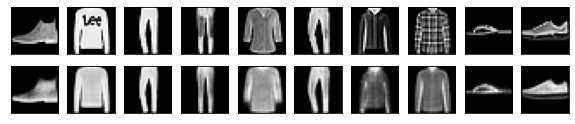

In [27]:
n = 10
plt.figure(figsize=(10, 2))
for i in range(n): 
    ax = plt.subplot(2, n, i + 1)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.imshow(xTest[i].reshape(28, 28))
    plt.gray()
 
    ax = plt.subplot(2, n, i + 1 + n)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.imshow(pred_images[i].reshape(28, 28))